In [33]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/iris")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'iris' dataset.
Path to dataset files: /kaggle/input/iris


In [34]:
import pandas as pd

In [35]:
dataset = pd.read_csv("/kaggle/input/iris/Iris.csv")
print("✅ Dataset Loaded")
print(dataset.head())

✅ Dataset Loaded
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [36]:
print("Dataset Info:")
print(dataset.info())
print("\nFirst 5 rows:")
print(dataset.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None

First 5 rows:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2

In [37]:

# Drop ID and Species (unsupervised, we don’t use labels)
X = dataset.drop(columns=["Id", "Species"])

In [38]:

# STEP 3: Preprocessing - Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [39]:
# STEP 4: KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X_scaled)

KMeans(n_clusters=3, n_init=10, random_state=42)

In [40]:
# Assign cluster labels to dataset
dataset["Cluster"] = kmeans.labels_

In [41]:

print("\nCluster counts:")
print(dataset["Cluster"].value_counts())


Cluster counts:
Cluster
0    53
1    50
2    47
Name: count, dtype: int64


In [42]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pickle

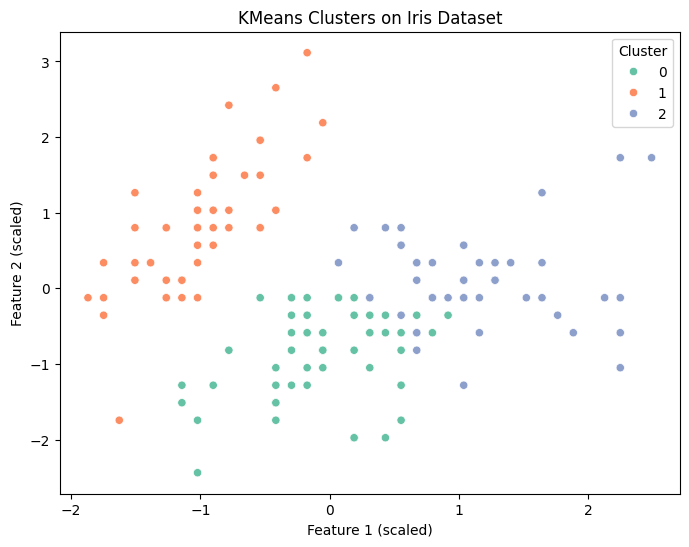

In [43]:
# STEP 5: Visualization
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_scaled[:,0], y=X_scaled[:,1], hue=dataset["Cluster"], palette="Set2")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.title("KMeans Clusters on Iris Dataset")
plt.show()

In [44]:
# STEP 6: Save model and scaler with Pickle
with open("kmeans_model.pkl", "wb") as f:
    pickle.dump(kmeans, f)

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

print("✅ Model and Scaler saved as pickle files.")

# STEP 7: Load and Predict New Data
with open("kmeans_model.pkl", "rb") as f:
    loaded_kmeans = pickle.load(f)

with open("scaler.pkl", "rb") as f:
    loaded_scaler = pickle.load(f)

✅ Model and Scaler saved as pickle files.


In [45]:
# Example new input (sepal length, sepal width, petal length, petal width)
new_data = pd.DataFrame([[5.1, 3.5, 1.4, 0.2]], columns=X.columns)

new_scaled = loaded_scaler.transform(new_data)
prediction = loaded_kmeans.predict(new_scaled)

print("\nNew Data:", new_data.values)
print("Predicted Cluster:", prediction[0])


New Data: [[5.1 3.5 1.4 0.2]]
Predicted Cluster: 1
